In [16]:
import os
import timeit

import pybamm
import matplotlib.pyplot as plt

from func_project import *


os.chdir(pybamm.__path__[0] + "/..")


In [ ]:
start = timeit.default_timer()
model = pybamm.lithium_ion.DFN(
    {
        "particle phases": ("2", "1"),
        "open-circuit potential": (("single", "current sigmoid"), "single"),
    }
)
param = pybamm.ParameterValues("Chen2020_composite")

param.update({"Upper voltage cut-off [V]": 4.5})
param.update({"Lower voltage cut-off [V]": 2.5})

param.update(
    {
        "Primary: Maximum concentration in negative electrode [mol.m-3]": 28700,
        "Primary: Initial concentration in negative electrode [mol.m-3]": 23000,
        "Primary: Negative particle diffusivity [m2.s-1]": 5.5e-14,
        "Secondary: Negative particle diffusivity [m2.s-1]": 1.67e-14,
        "Secondary: Initial concentration in negative electrode [mol.m-3]": 277000,
        "Secondary: Maximum concentration in negative electrode [mol.m-3]": 278000,
    }
)

In [18]:
C_rate = 0.5
capacity = param["Nominal cell capacity [A.h]"]
I_load = C_rate * capacity

t_eval = [0, 10000]

param["Current function [A]"] = I_load

In [19]:
v_si = [0.001, 0.04, 0.1]
total_am_volume_fraction = 0.75
solution = []
for v in v_si:
    param.update(
        {
            "Primary: Negative electrode active material volume fraction": (1 - v)
            * total_am_volume_fraction,  # primary
            "Secondary: Negative electrode active material volume fraction": v
            * total_am_volume_fraction,
        }
    )
    print(v)
    sim = pybamm.Simulation(
        model,
        parameter_values=param,
    )
    solution.append(sim.solve(t_eval=t_eval))
stop = timeit.default_timer()
print("running time: " + str(stop - start) + "s")

0.001
0.04
0.1
running time: 1.3074705000035465s


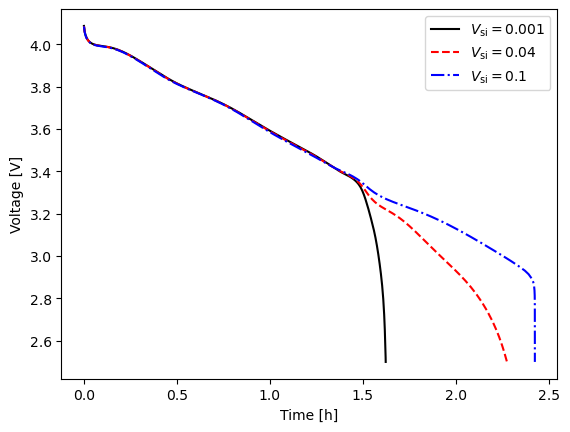

In [20]:
ltype = ["k-", "r--", "b-.", "g:", "m-", "c--", "y-."]
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    V_i = solution[i]["Voltage [V]"].entries
    plt.plot(t_i, V_i, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Voltage [V]")
plt.legend()

Text(0.5, 1.0, 'Silicon')

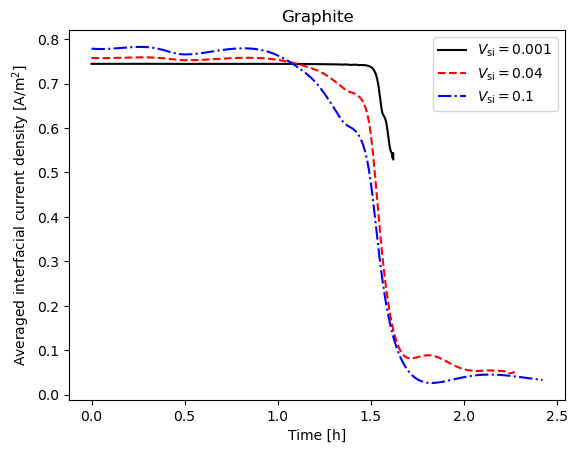

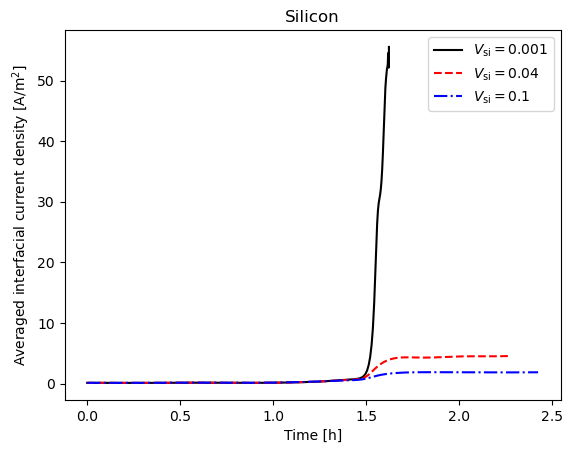

In [21]:
plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    j_n_p1_av = solution[i][
        "X-averaged negative electrode primary interfacial current density [A.m-2]"
    ].entries
    plt.plot(t_i, j_n_p1_av, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Averaged interfacial current density [A/m$^{2}$]")
plt.legend()
plt.title("Graphite")

plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    j_n_p2_av = solution[i][
        "X-averaged negative electrode secondary interfacial current density [A.m-2]"
    ].entries
    plt.plot(t_i, j_n_p2_av, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Averaged interfacial current density [A/m$^{2}$]")
plt.legend()
plt.title("Silicon")

Text(0.5, 1.0, 'Silicon')

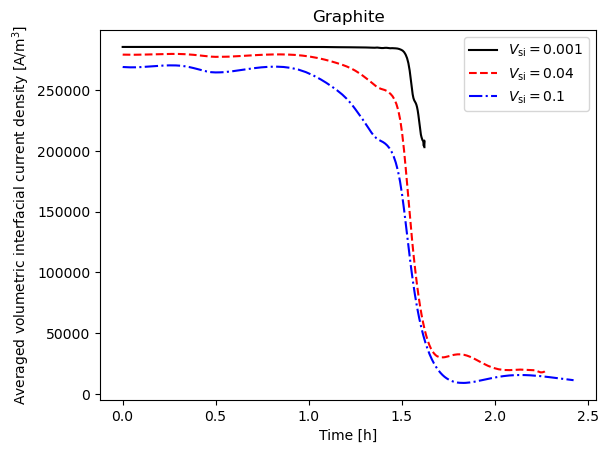

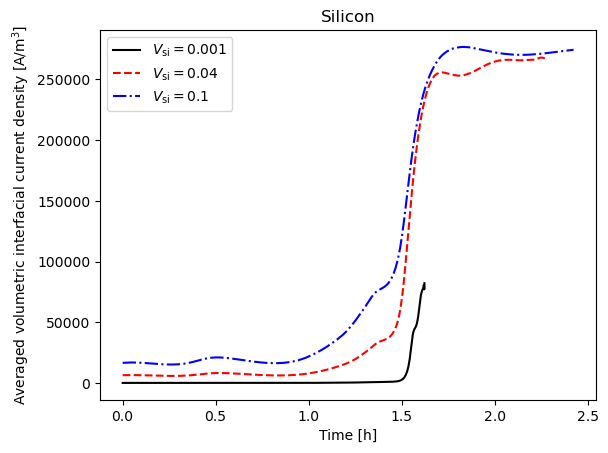

In [22]:
plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    j_n_p1_Vav = solution[i][
        "X-averaged negative electrode primary volumetric interfacial current density [A.m-3]"
    ].entries
    plt.plot(t_i, j_n_p1_Vav, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Averaged volumetric interfacial current density [A/m$^{3}$]")
plt.legend()
plt.title("Graphite")

plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    j_n_p2_Vav = solution[i][
        "X-averaged negative electrode secondary volumetric interfacial current density [A.m-3]"
    ].entries
    plt.plot(t_i, j_n_p2_Vav, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Averaged volumetric interfacial current density [A/m$^{3}$]")
plt.legend()
plt.title("Silicon")

Text(0.5, 1.0, 'Silicon')

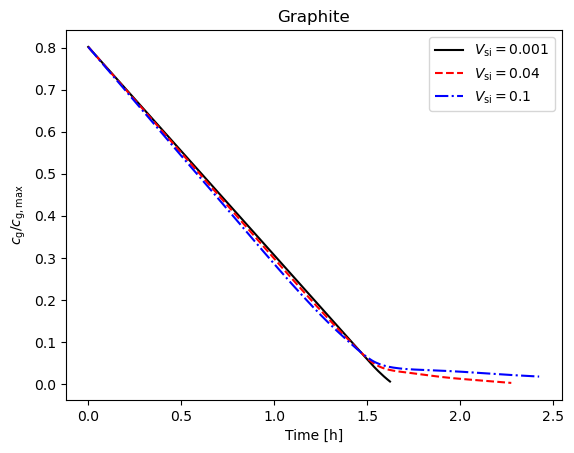

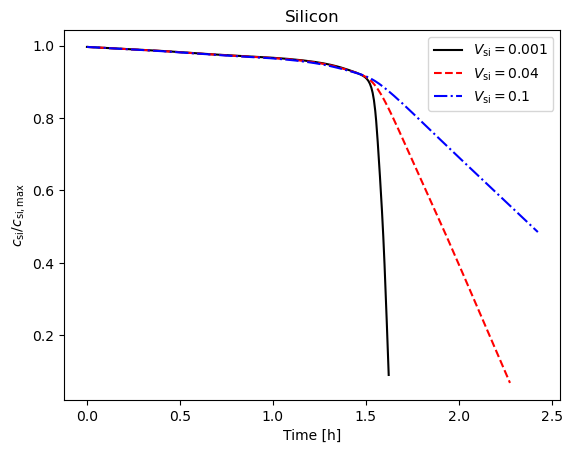

In [23]:
plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    c_s_xrav_n_p1 = solution[i][
        "Average negative primary particle concentration"
    ].entries
    plt.plot(t_i, c_s_xrav_n_p1, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("$c_\mathrm{g}/c_\mathrm{g,max}$")
plt.legend()
plt.title("Graphite")

plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    c_s_xrav_n_p2 = solution[i][
        "Average negative secondary particle concentration"
    ].entries
    plt.plot(t_i, c_s_xrav_n_p2, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("$c_\mathrm{si}/c_\mathrm{si,max}$")
plt.legend()
plt.title("Silicon")

Text(0.5, 1.0, 'NMC811')

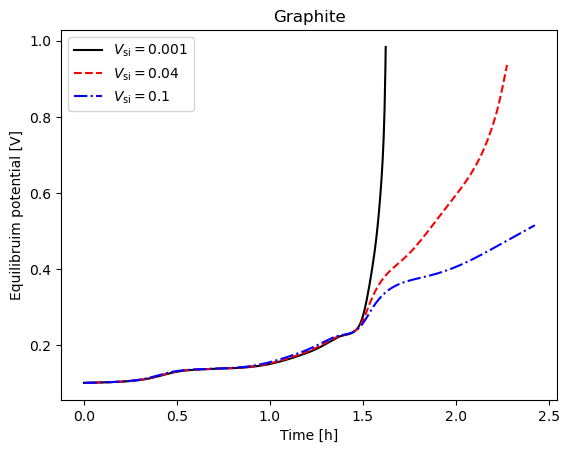

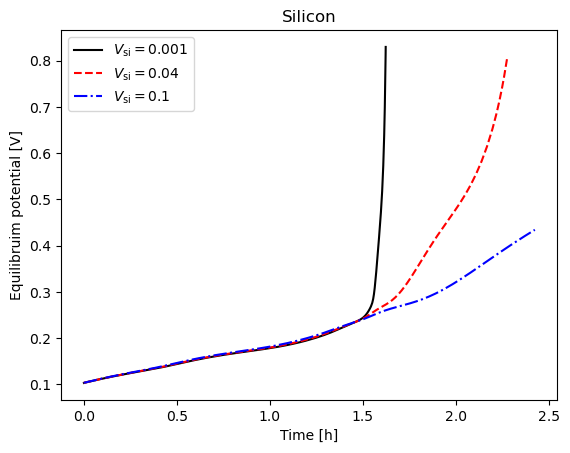

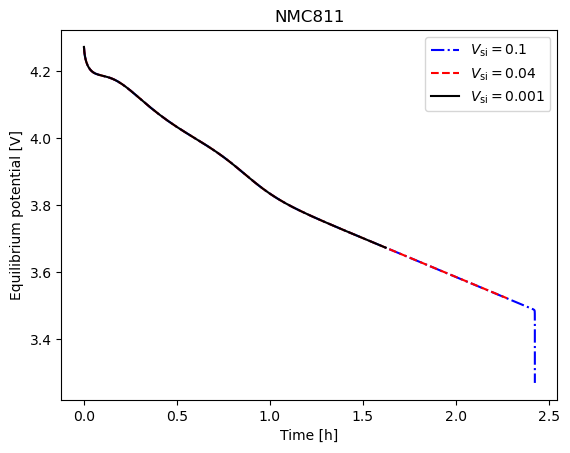

In [24]:
plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    ocp_p1 = solution[i][
        "X-averaged negative electrode primary open-circuit potential [V]"
    ].entries
    plt.plot(t_i, ocp_p1, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Equilibruim potential [V]")
plt.legend()
plt.title("Graphite")

plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    ocp_p2 = solution[i][
        "X-averaged negative electrode secondary open-circuit potential [V]"
    ].entries
    plt.plot(t_i, ocp_p2, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))
plt.xlabel("Time [h]")
plt.ylabel("Equilibruim potential [V]")
plt.legend()
plt.title("Silicon")

plt.figure()
for i in range(0, len(v_si)):
    t_i = solution[len(v_si) - 1 - i]["Time [s]"].entries / 3600
    ocp_p = solution[len(v_si) - 1 - i][
        "X-averaged positive electrode open-circuit potential [V]"
    ].entries
    plt.plot(
        t_i,
        ocp_p,
        ltype[len(v_si) - 1 - i],
        label="$V_\mathrm{si}=$" + str(v_si[len(v_si) - 1 - i]),
    )
plt.xlabel("Time [h]")
plt.ylabel("Equilibrium potential [V]")
plt.legend()
plt.title("NMC811")

## Multi cycle simulations

In [25]:
experiment = pybamm.Experiment(
    [
        (
            "Charge at 1C until 4.2 V",
            "Rest for 1 hour",
            "Discharge at 1C until 2.5 V",
            "Rest for 1 hour",           
        ),
    ]* 10
)

0.001
0.04
0.1
running time: 29.280579300015233s


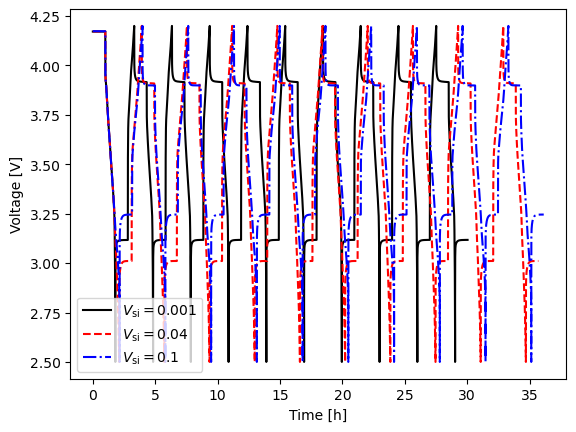

In [27]:
v_si = [0.001, 0.04, 0.1]
total_am_volume_fraction = 0.75

solution = []
for v in v_si:
    param.update(
        {
            "Primary: Negative electrode active material volume fraction": (1 - v)
            * total_am_volume_fraction,  # primary
            "Secondary: Negative electrode active material volume fraction": v
            * total_am_volume_fraction,
        }
    )
    print(v)
    sim = pybamm.Simulation(
        model,
        experiment=experiment,
        parameter_values=param,
    )
    solution.append(sim.solve( calc_esoh=False))
stop = timeit.default_timer()
print("running time: " + str(stop - start) + "s")

ltype = ["k-", "r--", "b-.", "g:", "m-", "c--", "y-."]
for i in range(0, len(v_si)):
    t_i = solution[i]["Time [s]"].entries / 3600
    V_i = solution[i]["Voltage [V]"].entries
    
    
    plt.plot(t_i, V_i, ltype[i], label="$V_\mathrm{si}=$" + str(v_si[i]))

plt.xlabel("Time [h]")
plt.ylabel("Voltage [V]")
plt.legend()